In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [3]:
data.index = pd.to_datetime(data.index)

In [6]:
data.dropna(inplace = True)

In [7]:
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [9]:
split1 = int(len(data) * 0.6)
split2 = int(len(data) * 0.9)
data_in = data[:split1]
data_out = data[split1:split2]
data_hold = data[split2:]

In [10]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [12]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [13]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [14]:
import matplotlib.pyplot as plt

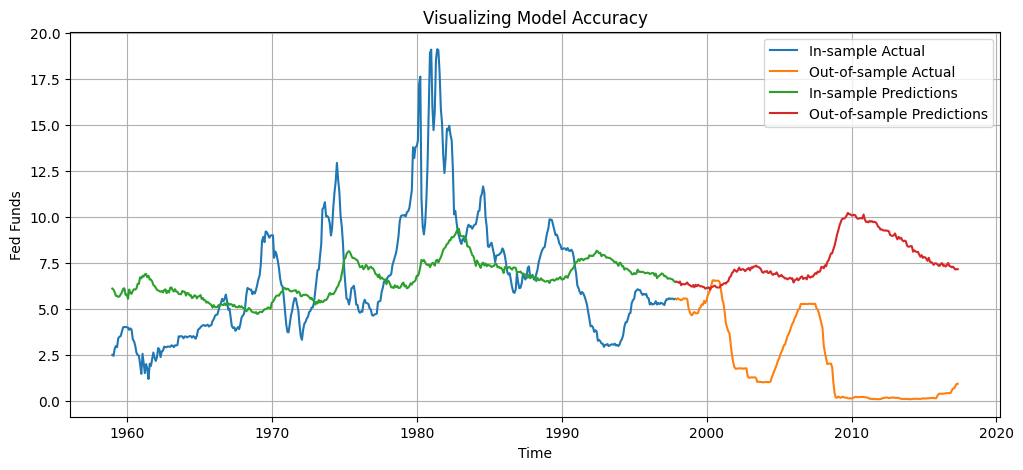

In [16]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend(["In-sample Actual","Out-of-sample Actual","In-sample Predictions","Out-of-sample Predictions"])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
in_mse_1 = mean_squared_error(y_in, model1.predict(X_in))
out_mse_1 = mean_squared_error(y_out, model1.predict(X_out))

In [19]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783566723


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
maxdegrees = 3

DEGREES: 1


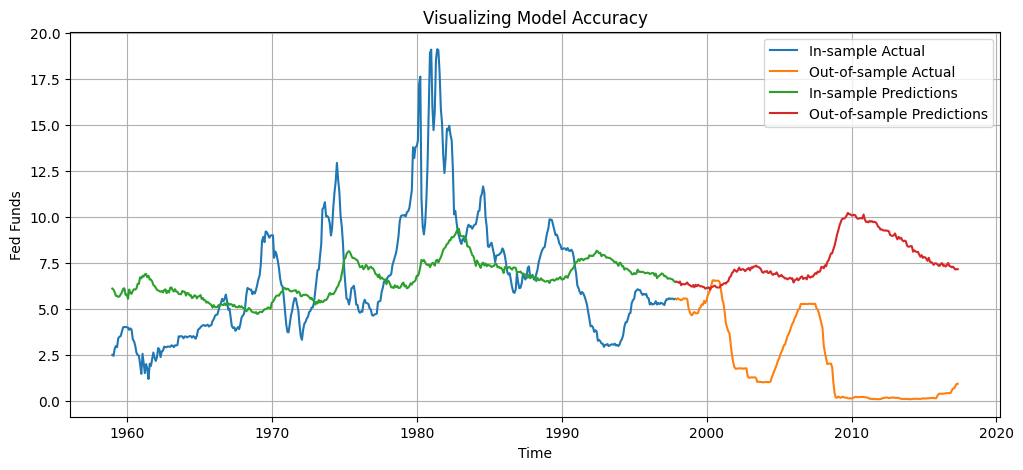

Insample MSE: 10.071422013168641
Outsample MSE: 40.36082783565256

DEGREES: 2


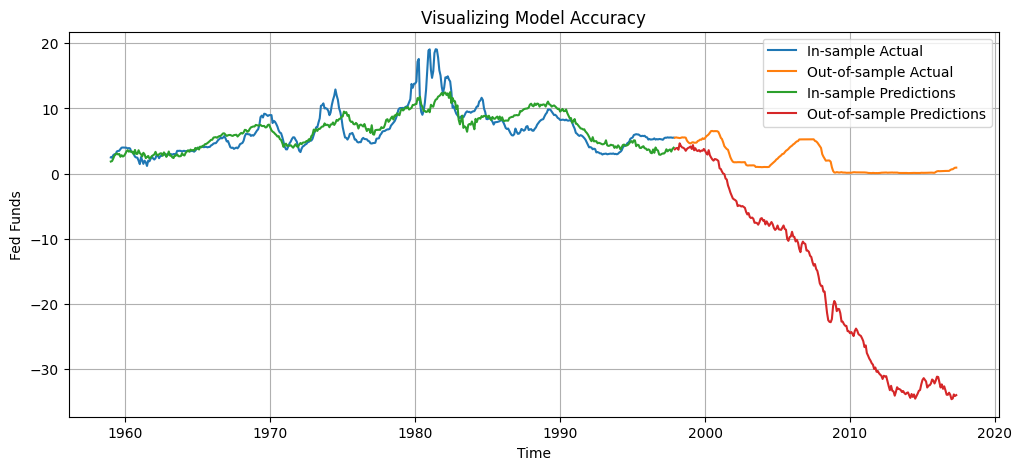

Insample MSE: 3.8634771392760685
Outsample MSE: 481.44650988981857

DEGREES: 3


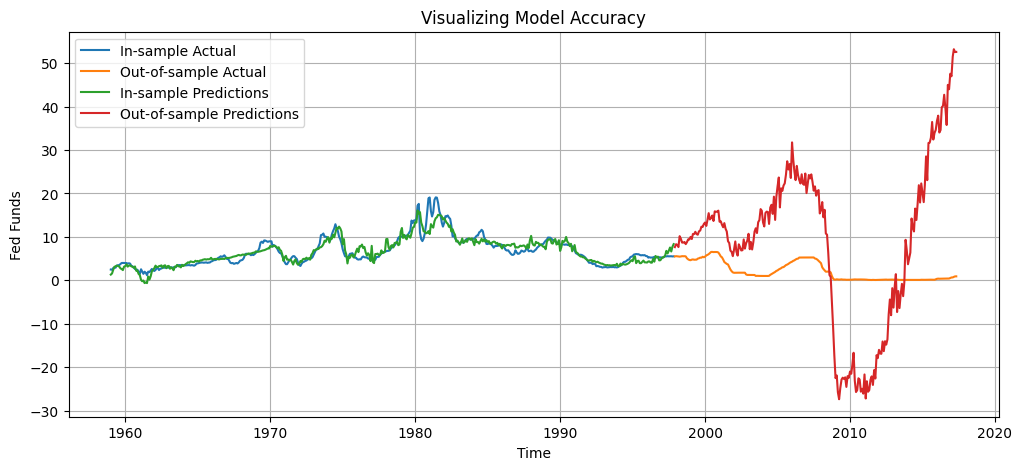

Insample MSE: 1.8723636291944272
Outsample MSE: 371.7674950018752



In [31]:
for degrees in range(1, maxdegrees + 1):
    print("DEGREES:", degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)
    
    #Q3
    model1 = sm.OLS(y_in, X_in_poly).fit()
    
    #Q4
    plt.figure(figsize = (12,5))
    
    in_preds = model1.predict(X_in_poly)
    in_preds = pd.DataFrame(in_preds, index = y_in.index)
    out_preds = model1.predict(X_out_poly)
    out_preds = pd.DataFrame(out_preds, index = y_out.index)
    
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(in_preds)
    plt.plot(out_preds)

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(["In-sample Actual","Out-of-sample Actual","In-sample Predictions","Out-of-sample Predictions"])
    plt.grid()
    plt.show()
    
    #Q5
    in_mse_1 = mean_squared_error(model1.predict(X_in_poly), y_in)
    out_mse_1 = mean_squared_error(model1.predict(X_out_poly), y_out)
    
    print("Insample MSE:", in_mse_1)
    print("Outsample MSE:", out_mse_1)
    print("")

# 7.) State your observations :

**Degree 1 (Linear Model):**
The in-sample MSE is quite high at approximately 10, suggesting that the model does not fit the training data well.
The out-of-sample MSE is even higher at around 40, indicating poor predictive performance on unseen data.  

**Degree 2:**
The second-degree polynomial captures some of the curvature in the data, which suggests that it fits the training data better than the linear model.
The in-sample MSE is significantly lower than the linear model at approximately 3.86, indicating a better fit for the training data.
However, the out-of-sample MSE is drastically higher at about 481, suggesting that the model performs much worse on out-of-sample data and could be overfitting.

**Degree 3:**
The in-sample MSE is the lowest among the three models at approximately 1.87, indicating a very good fit to the training data.
Similar to the second-degree model, the out-of-sample MSE is very high at around 371, indicating that the model may be overfitting.

As the complexity of the model increases (from degree 1 to 3), the in-sample MSE decreases, suggesting that the model is fitting the training data increasingly better. However, the out-of-sample MSE increases with higher degrees, indicating that the models may be capturing noise in the training data rather than underlying trends, which might be an overfitting issue.